In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.datasets.samples_generator import make_blobs

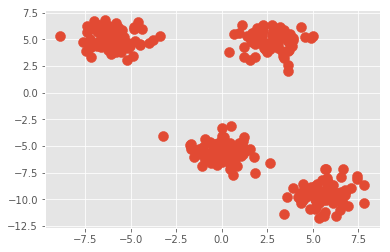

In [11]:
X, y_true = make_blobs(n_samples=300,
                       centers=4,
                       cluster_std=1.0,
                       random_state=10)

plt.scatter(X[:,0],X[:,1],s=100)

In [12]:
import cv2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [43]:
import numpy as np
import collections

compactness, labels, centers = cv2.kmeans(X.astype(np.float32),4,None,criteria,10,flags)
count = collections.Counter(labels[:,0])
count

Counter({3: 75, 0: 75, 1: 75, 2: 75})

In [46]:
color_codes = {0:'#370d93', 1:'#6b64b0', 2:'#759fdf', 3:'#c5f4f9'}
colors = [color_codes[i] for i in labels[:,0]]
colors

['#c5f4f9',
 '#370d93',
 '#370d93',
 '#370d93',
 '#6b64b0',
 '#759fdf',
 '#759fdf',
 '#c5f4f9',
 '#370d93',
 '#370d93',
 '#c5f4f9',
 '#6b64b0',
 '#759fdf',
 '#c5f4f9',
 '#370d93',
 '#370d93',
 '#c5f4f9',
 '#6b64b0',
 '#759fdf',
 '#6b64b0',
 '#759fdf',
 '#370d93',
 '#370d93',
 '#370d93',
 '#759fdf',
 '#6b64b0',
 '#6b64b0',
 '#6b64b0',
 '#759fdf',
 '#6b64b0',
 '#370d93',
 '#759fdf',
 '#6b64b0',
 '#c5f4f9',
 '#759fdf',
 '#370d93',
 '#370d93',
 '#370d93',
 '#6b64b0',
 '#370d93',
 '#370d93',
 '#c5f4f9',
 '#6b64b0',
 '#370d93',
 '#6b64b0',
 '#c5f4f9',
 '#6b64b0',
 '#370d93',
 '#370d93',
 '#6b64b0',
 '#370d93',
 '#370d93',
 '#c5f4f9',
 '#c5f4f9',
 '#759fdf',
 '#759fdf',
 '#370d93',
 '#c5f4f9',
 '#759fdf',
 '#759fdf',
 '#370d93',
 '#759fdf',
 '#759fdf',
 '#c5f4f9',
 '#759fdf',
 '#c5f4f9',
 '#6b64b0',
 '#6b64b0',
 '#759fdf',
 '#6b64b0',
 '#370d93',
 '#6b64b0',
 '#759fdf',
 '#c5f4f9',
 '#6b64b0',
 '#6b64b0',
 '#759fdf',
 '#6b64b0',
 '#759fdf',
 '#370d93',
 '#6b64b0',
 '#370d93',
 '#6b64b0',
 '#c

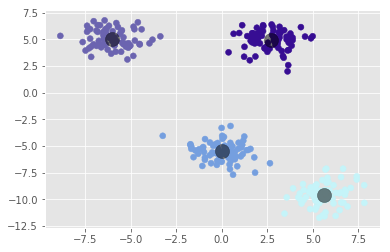

In [47]:
plt.scatter(X[:,0],X[:,1],color=colors)
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

In [20]:
labels.shape

(300, 1)

In [21]:
X[:,0].shape, X[:,1].shape

((300,), (300,))

In [48]:
img = cv2.imread('./zumi0.jpg', cv2.IMREAD_COLOR)

In [49]:
plt.rc('axes', **{'grid':False})

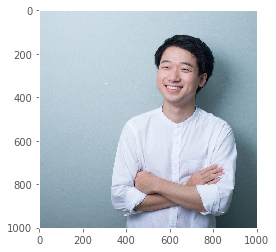

In [50]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [51]:
img.shape

(1001, 1001, 3)

In [52]:
img_data = img / 255.0
img_data = img_data.reshape((-1,3))
img_data.shape

(1002001, 3)

In [53]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    pixel = data[i].T
    R,G,B = pixel[0], pixel[1], pixel[2]
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.subtitle(title,size=20)


AttributeError: 'Figure' object has no attribute 'subtitle'

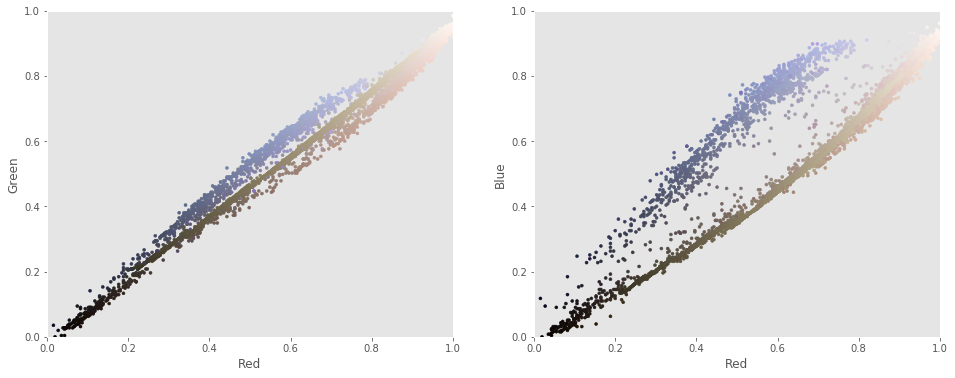

In [54]:
plot_pixels(img_data,title='Input color space: 16 million possible colors')

In [55]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [56]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [57]:
digits.data = digits.data.astype(np.float32)
compactness, clusters, centers = cv2.kmeans(digits.data,10,None,criteria,10,flags)

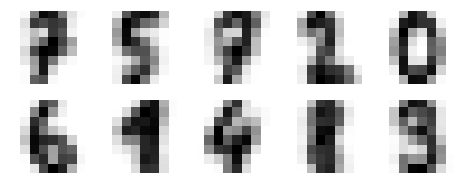

In [60]:
fig, ax = plt.subplots(2,5,figsize=(8,3))
centers = centers.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)